# Logistic Regression
In the field of supervised learning (learning in a situation in which we have both the data (X) and the desired results (Y)), classification is one of the significant tasks which involve mapping new data to it's corresponding class based on the previous data which model trained on.
Logistic regression (also known as the logit model) is a binary classification algorithm which means that the output of the algorithm (P) will indicate the probability of an event happening  (P) or not happening (P-1). Nevertheless, the output of the logit function is always between 0 and 1 (which by using a threshold, output of the model can reduce to either 0 or 1).

---



## Project overview

This notebook is divided into two main parts:
 - Implementing a simple binary classifier that uses a linear decision boundary.
 - Implementing a bindary classifier that uses a non-linear decision boundary.

The purpose of each part of this notebook is to implement a logistic regression classfier from scratch and compare it's results to another classifier which implemented by scikit-learn. 

In this project, we have two independent, and one dependent variable, and both of the datasets used in this project are artificially created using `sklearn.datasets` submodule. The project is only aimed at educational purposes, so the problem that we are trying to solve is not a real-world problem (nor is data).

As always, the first cell contains instructions to import the used modules, also the last line contains the instruction to set `ggplot` as the used plot style in this notebook.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import  make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

plt.style.use('ggplot')  

---
---
## First Part
---
---

---
### Section I
---

As mentioned before, all datasets used in this notebook are artificially created (this means that these data are not downloaded or gathered from anywhere). In the following cell, we are creating a dataset of **200 records** with **two classes** and **two features** in it using the `make_classification` function.

In [2]:
dataset_tuple = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0,
                                    n_classes=2, flip_y=0.001, hypercube=False, class_sep=1.5, random_state=14)

`make_classification` function returns a tuple as it's output which holds the features in the 0 index and the results/classes in the 1 index, both as a `numpy.ndarray` object. In the next cell, the features and labels `ndarrays` are converted into `DataFrames` called **Xs** and **ys** respectively. then both of these `DataFrames` are concatenated together in order to make a `DataFrame` that represents the whole dataset. 

In [3]:
Xs = pd.DataFrame(dataset_tuple[0], columns=['f1', 'f2'])
ys = pd.DataFrame(dataset_tuple[1], columns=['class_'])
dataset = pd.concat([Xs, ys], axis=1)

Next cell will call `head` method of the DataFrame object to display it's first 5 rows of the `dataset` DataFrame.

In [4]:
dataset.head()

,f1,f2,class_
0,1.302249,-0.623752,1
1,-0.409616,-0.588821,0
2,-2.012866,-0.590532,0
3,1.255486,-0.388024,1
4,1.274457,-0.585658,1


In the following cell, we are using maplotlib module to visualzie content of the `dataset` DataFrame.

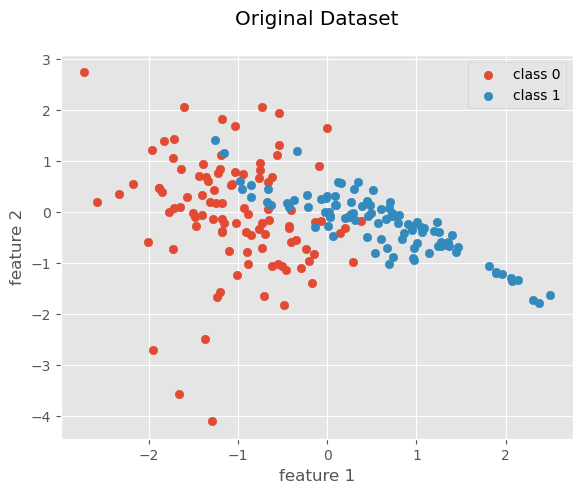

In [5]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 0.8, 0.8])
axes.scatter(dataset[dataset['class_']==0]['f1'], dataset[dataset['class_']==0]['f2'], label='class 0')
axes.scatter(dataset[dataset['class_']==1]['f1'], dataset[dataset['class_']==1]['f2'], label='class 1')
axes.set_xlabel('feature 1')
axes.set_ylabel('feature 2')
axes.set_title('Original Dataset\n')
axes.legend()


As shown by the above plot, there is no clear linear distintion between two classes of `dataset`. In order to make some space between two classes, we are going to **add** 1 to the second feature of each datapoint that is labled as **class 1**, and **subtract** 1 from the second feature of each datapoint that is labled as **class 0**.

In [6]:
# make some distance between two classes
mask_class1 = dataset['class_'] == 1
dataset.loc[mask_class1, 'f2'] = dataset.loc[mask_class1, 'f2'] + 1
mask_class0 = dataset['class_'] == 0
dataset.loc[mask_class0, 'f2'] = dataset.loc[mask_class0, 'f2'] - 1
dataset.head()

,f1,f2,class_
0,1.302249,0.376248,1
1,-0.409616,-1.588821,0
2,-2.012866,-1.590532,0
3,1.255486,0.611976,1
4,1.274457,0.414342,1


In the following, there is a visualization of data after applying the new values to the second feature of each data point.

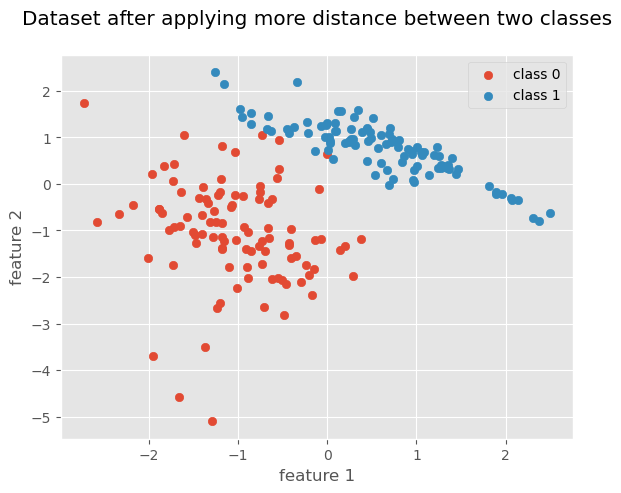

In [7]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 0.8, 0.8])
axes.scatter(dataset[dataset['class_']==0]['f1'], dataset[dataset['class_']==0]['f2'], label='class 0')
axes.scatter(dataset[dataset['class_']==1]['f1'], dataset[dataset['class_']==1]['f2'], label='class 1')
axes.set_xlabel('feature 1')
axes.set_ylabel('feature 2')
axes.set_title('Dataset after applying more distance between two classes\n')
axes.legend()

The next step is to split the data into **training** and **testing** data. After splitting, in visualization, the test data points are indicated with green circles around them. 

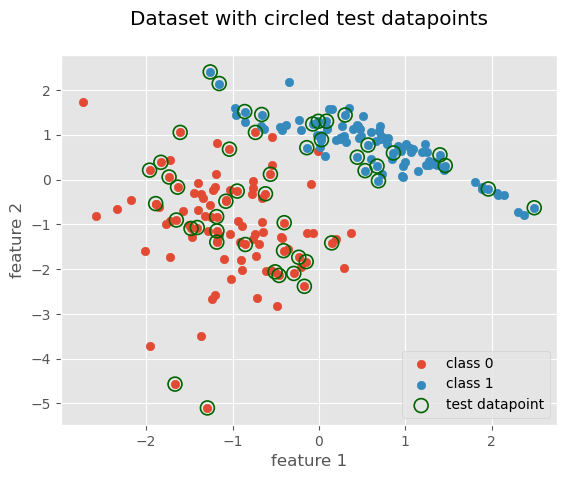

In [8]:
Xs = np.array(dataset.loc[:, ['f1', 'f2']])
Ys = np.array(dataset.loc[:, ['class_']]).astype(np.float64)
Ys = Ys[:, 0]


plt.scatter(dataset[dataset['class_']==0]['f1'], dataset[dataset['class_']==0]['f2'], label='class 0')
plt.scatter(dataset[dataset['class_']==1]['f1'], dataset[dataset['class_']==1]['f2'], label='class 1')

X_train, X_test, y_train, y_test = train_test_split(Xs, Ys, test_size=0.25, random_state=4)
plt.scatter(X_test[:, 0], X_test[:, 1], facecolor='none', edgecolor='darkgreen', s=100, label='test datapoint', linewidths=1.2)

plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Dataset with circled test datapoints\n')
plt.legend(loc='lower right')
plt.show()

In the following cell, there is a class named `logistic_regression`, which provides us the from-scratch version of logistic regression with a linear decision boundary.

#### Hypothesis representation 
Logit/sigmoid function: 
$$ g(z) = \dfrac{1}{1+e^{-z}} $$


In logistic regression, the input of logit function is defined as the dot product of the input data and theta parameters:
$$ \theta^TX = \theta_0 x^{(i)}_0 + \theta_1 x^{(i)}_1 + ... \qquad\qquad i = 1,2,...,m \quad,\quad m\text{ is the number of samples}$$


So the final hypothesis for logistic regression is expressed as below:
$$ h(\theta) = g(\theta^TX) = \dfrac{1}{1+e^{-\theta^TX}} $$


#### Cost function
One of the used mathematical functions to represent the cost function of the logistic regression, is **Maximum Likelihood Estimation (MLE)**. The cost function that we used for this particular classifier is **Log** of **MLE**, which defined as the sum of the likelihoods (log of multipls equals to the sum of the logs):
$$ \qquad\qquad\qquad\qquad J(\theta) = \sum_{i=1}^{m} (y^{(i)})log(h_\theta(x^{(i)})) + (1-y^{(i)})log(1-h_\theta(x^{(i)})) \qquad\qquad y^{(i)} \in \{0,1\} \quad,\quad i = 1,2,...,m \quad,\quad m\text{ is the number of samples} $$


#### Optimization method
The optimization method used in this example is gradient descent, which calculates the gradients relative to each parameter and updates the parameters accordingly:
$$\qquad\qquad\qquad\qquad\qquad\qquad\qquad \dfrac{∂}{∂\theta}J(\theta)=\dfrac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)}).x^{(i)} \qquad\qquad y^{(i)} \in \{0,1\} \quad,\quad i = 1,2,...,m \quad,\quad m\text{ is the number of samples}$$

**Note**: here we are using full batch gradient descent, which that means in each update, we are using the whole dataset to estimate how badly our model is performing.

In [10]:
class logistic_regression():
    
    def __init__(self, alpha, num_of_features):
        # add one more feature that represents the bias
        num_of_features += 1
        self.thetas = [0 for i in range(num_of_features)]
        self.thetas = self.initializer(num_of_features)
        self.alpha = alpha
    
    def hypothesis(self, x):
        # add the bias term to feature dataset
        x = np.concatenate((np.ones_like(x[:, 0]).reshape((-1, 1)), x), axis=1)
        z = 0
        for i in range(len(self.thetas)):
            z += self.thetas[i] * x[:, i]
        res = 1 / (1 + np.exp(-z))
        return res
    
    def cost_function(self, x, y):
        predicted_y = self.hypothesis(x)
        # in order to prevent zero division error in np.log() function
        predicted_y = np.where(predicted_y == 0, 0.00000000001, predicted_y)
        predicted_y = np.where(predicted_y == 1, 0.99999999999, predicted_y)
        cost = (-1 * (y * np.log(predicted_y) + (1-y) * np.log(1 - predicted_y))).sum() * 1/len(y)
        return cost
    
    def update(self, x, y):
        predicted_y = self.hypothesis(x)
        x = np.concatenate((np.ones_like(x[:, 0]).reshape((-1, 1)), x), axis=1)
        delta_thetas = []

        # calculate gradients for each theta parameter
        for i in range(len(self.thetas)):
            delta_thetas.append(((predicted_y - y) * x[:, i]).sum() * 1/len(y))
        
        # updata each theta parameter using the calculated gradients
        for i in range(len(self.thetas)):
            self.thetas[i] = self.thetas[i] - (self.alpha * delta_thetas[i])

    def initializer(self, num):
        np.random.seed(1)
        return np.random.random(num)

    def predict(self, x):
        predicted_y = self.hypothesis(x)
        predicted_y = np.round(predicted_y)
        return predicted_y


In order to create our from-scratch classifier model, we are going instantiate an identifier called `my_classifier`. After creating `my_classifier` instance, we are going to train the model on the training data and the meanwhile, an animated plot of the model's decision boundary on the data will be created at the end of the training process. 

**Note**: In order to plot the decision boundary, we are using $\theta{s}$  (bias, and coefficients) to make a straight-line's equation, and in that equation, $x_1$ is taken as input and the corresponding output value will be on $x_2$ axis.

As mentioned before, the output of the logit function will always be between 0 and 1. The desired output is discrete values of either 0 or 1, by setting value 0.5 as the threshold, we can conclude that the output will be 1 if $\quad\theta^TX > 0\quad$, and 1 if $\quad\theta^TX < 0$. As a result, the decision boundary is defined by the equation $\quad\theta^TX = 0$.

$\text{Equation of straight line : }\qquad y=mx+b\qquad\qquad$

$\text{Equation of decision boundary : }\qquad 0 \quad=\quad \theta^TX$

$ \qquad \quad 0 \quad=\quad \theta^TX \quad=\quad \theta_0 \times x_0 + \theta_1 \times x_1 + \theta_2 \times x_2 \qquad\qquad (x_0=1)$

$ \Rightarrow \qquad  (-1) \times \theta_2 \times x_2 \quad=\quad \theta_0 \times x_0 + \theta_1 \times x_1 $

$ \Rightarrow \qquad x_2 = (-1) \times \dfrac{\theta_0 \times x_0}{\theta_2} + (-1) \times \dfrac{\theta_1 \times x_1}{\theta_2}
  \qquad\qquad \left(
        y = x_2\quad,
  \quad x = x_1\quad,
  \quad m = (-1) \times \dfrac{\theta_1 \times x_1}{\theta_2} \quad,
  \quad b = (-1) \times \dfrac{\theta_0 \times x_0}{\theta_2}\right)$




The next step, envolves making an animation of the training procedure, we defined an `animate` function that acts as a frame creator for our animation, in each execution of this function, we are calculating the value of the accuracy and loss function's value on both train and test data and store these values in the form of list for further analysis, then plotting the dataset and the emerging decision boundary using the `matplotlib`, and finally, update the instance of `linear_regressor` class using `update` method.  

In [11]:
my_classifier = logistic_regression(alpha=0.05, num_of_features=2)
fig, ax = plt.subplots()
loss_on_train = []
loss_on_test = []
accuracy_on_train = []
accuracy_on_test = []

line_x = np.linspace(min(Xs[:, 0]), max(Xs[:, 0]), 100)

def animate(i):
    loss_on_train.append(my_classifier.cost_function(X_train, y_train))
    loss_on_test.append(my_classifier.cost_function(X_test, y_test))
    accuracy_on_train.append( np.mean(my_classifier.predict(X_train) == y_train))
    accuracy_on_test.append( np.mean(my_classifier.predict(X_test) == y_test))
    ax.cla()
    ax.set_title('Estimating the best Decision Boundary\n')
    ax.set_xlabel('feature 1')
    ax.set_ylabel('feature 2')
    ax.set_xlim(-3, 3)
    ax.set_ylim(-5.2, 3)
    
    m = -my_classifier.thetas[1] / my_classifier.thetas[2]
    c = -my_classifier.thetas[0] / my_classifier.thetas[2]
    line_y = m * line_x + c
    
    ax.scatter(dataset[dataset['class_']==0]['f1'], dataset[dataset['class_']==0]['f2'], label='class 0')
    ax.scatter(dataset[dataset['class_']==1]['f1'], dataset[dataset['class_']==1]['f2'], label='class 1')
    # ax.scatter(X_test[:, 0], X_test[:, 1], facecolor='none', edgecolor='darkgreen', s=100, label='test datapoint', linewidths=1.2, alpha=0.7)
    ax.plot(line_x, line_y, label='decision boundary', color='darkgreen', alpha=0.7, linestyle='--')
    ax.legend(loc='lower right')
    my_classifier.update(X_train, y_train)

ani = FuncAnimation(fig, animate, frames=600, interval=15)

plt.close()

Using `HTML` function, we have a video in output which shows how our straight-line decision boundary fits on the dataset, step by step.

The animation is available as `Logistic_regression(Linear dicision boundary).mp4` video file.

In [12]:
HTML(ani.to_html5_video())

The next two subplots are visualizing the behavior of loss function and accuracy on both train and test datasets as the number of training iterations increases.

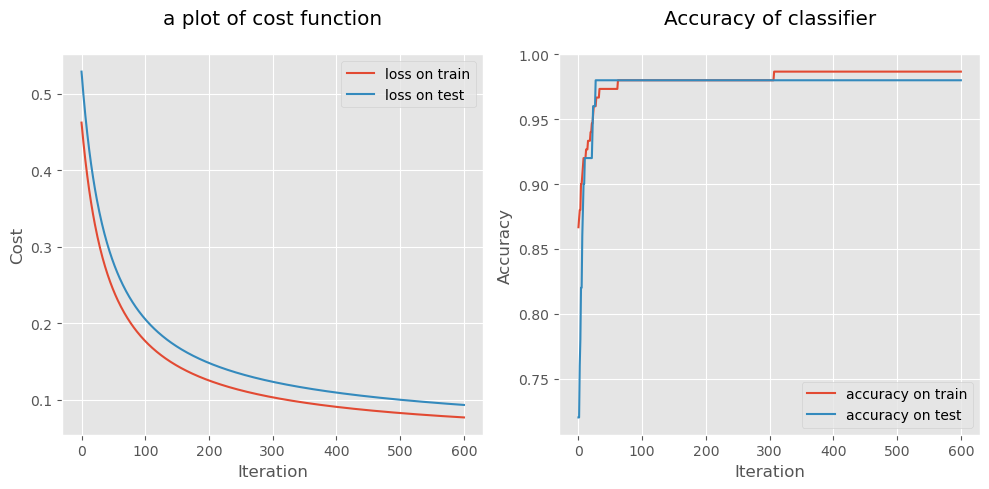

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))


axes[0].plot(list(range(len(loss_on_train))), loss_on_train, label='loss on train')
axes[0].plot(list(range(len(loss_on_test))), loss_on_test, label='loss on test')
axes[0].legend()
axes[0].set_title('a plot of cost function\n')
axes[0].set_xlabel('Iteration')
axes[0].set_ylabel('Cost')


axes[1].plot(list(range(len(accuracy_on_train))), accuracy_on_train, label='accuracy on train')
axes[1].plot(list(range(len(accuracy_on_test))), accuracy_on_test, label='accuracy on test')
axes[1].legend()
axes[1].set_title('Accuracy of classifier\n')
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('Accuracy')
plt.tight_layout()
plt.show()

---
### Section II
---

In the second section of part one, we are going to create a logistic regression classifier model using scikit-learn module. The created classifier uses default values for the parameters of `LogisticRegression` class. 

**Note**: In this new classifier, `lbfgs` is used as the solver for the classifier, however, we used the **gradient descent** as the solver for the from-scratch version of the classifier. 

One of the big differences between `lbfgs` and `gradient descent` is the fact that is necessary to set a value for the hyperparameter $\alpha$ in `gradient descent`, however, there is no such thing in `lbfgs`.

After creating the classifier, then its going to be trained on train dataset. 

In [14]:
sklearn_classifier = LogisticRegression()

sklearn_classifier.fit(X_train, y_train)

LogisticRegression()

now we have both classifiers created and trained, so the next step is to compare models. to fulfill this objective, first of all, we are going to visualize the decision boundaries of both models in two subplots, in the next cell.

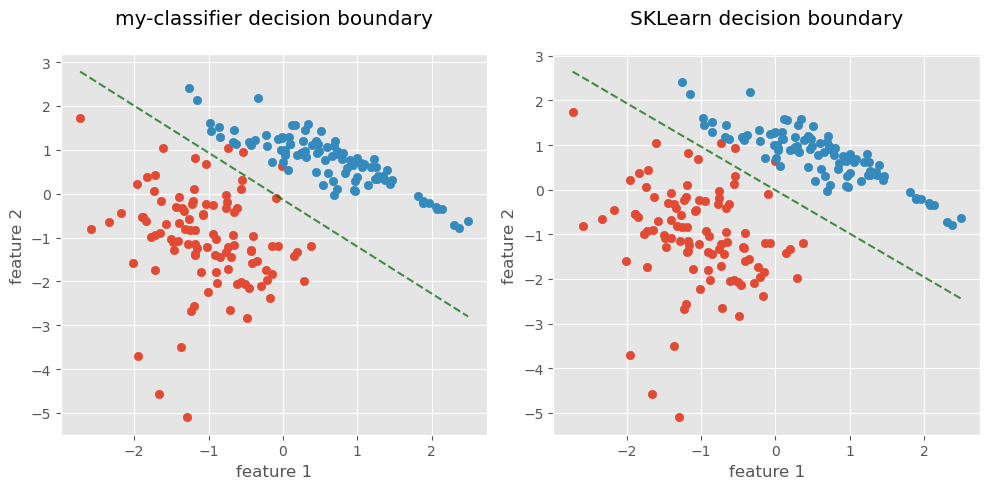

In [15]:
line_x = np.linspace(min(Xs[:, 0]), max(Xs[:, 0]), 100)
m = -my_classifier.thetas[1] / my_classifier.thetas[2]
c = -my_classifier.thetas[0] / my_classifier.thetas[2]
line_y = m * line_x + c


sk_line_x = np.linspace(min(Xs[:, 0]), max(Xs[:, 0]), 100)
m = -sklearn_classifier.coef_[0,0] / sklearn_classifier.coef_[0,1]
c = -sklearn_classifier.intercept_[0] / sklearn_classifier.coef_[0,1]
sk_line_y = m * line_x + c


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axes[0].scatter(dataset[dataset['class_']==0]['f1'], dataset[dataset['class_']==0]['f2'], label='class 0')
axes[0].scatter(dataset[dataset['class_']==1]['f1'], dataset[dataset['class_']==1]['f2'], label='class 1')
axes[0].plot(line_x, line_y, label='decision boundary', color='darkgreen', alpha=0.7, linestyle='--')
axes[0].set_xlabel('feature 1')
axes[0].set_ylabel('feature 2')
axes[0].set_title('my-classifier decision boundary\n')

axes[1].scatter(dataset[dataset['class_']==0]['f1'], dataset[dataset['class_']==0]['f2'], label='class 0')
axes[1].scatter(dataset[dataset['class_']==1]['f1'], dataset[dataset['class_']==1]['f2'], label='class 1')
axes[1].plot(sk_line_x, sk_line_y, label='decision boundary', color='darkgreen', alpha=0.7, linestyle='--')
axes[1].set_xlabel('feature 1')
axes[1].set_ylabel('feature 2')
axes[1].set_title('SKLearn decision boundary\n')

plt.tight_layout()
plt.show()

The next step to compare models is to calculate the accuracy of both models on the test dataset and compare the resulting values.

In [16]:
def accuracy_calculator(preds):
    acc = np.mean(preds == y_test)
    return acc

log_preds = my_classifier.predict(X_test)
sklearn_classifier_preds = sklearn_classifier.predict(X_test)

accuracy_on_mine = accuracy_calculator(log_preds)
accuracy_on_sklearn = accuracy_calculator(sklearn_classifier_preds)

print('\n-------------------------------------------------------------------------------------------------')
print('final accuracy of the from scratch version on test dataset :', accuracy_on_mine)
print('-------------------------------------------------------------------------------------------------')
print('final accuracy of the scikit-learn linear regression model on test dataset :', accuracy_on_sklearn)
print('-------------------------------------------------------------------------------------------------\n')


-------------------------------------------------------------------------------------------------
final accuracy of the from scratch version on test dataset : 0.98
-------------------------------------------------------------------------------------------------
final accuracy of the scikit-learn linear regression model on test dataset : 0.98
-------------------------------------------------------------------------------------------------



As shown in above, the accuracy of both from-scratch and scikit-learn models are identical.

---
---
## Second Part
---
---

The second part of this notebook involves solving a classification problem that can't be solved by a linear decision boundary, hence by adding a second-order feature to the dataset, the linear decision boundary will become a curved decision boundary.

---
### Section I
---

As always, the first section of the each part, contains the implementation of the from-scratch version of the classifier. 

To provide the data that is going to be used in the second part, we are using `make_cricles` function. First of all we are making two circles of data, one circle inside the other. Each circle represents the data of one class. After visualizing the original data as the first subplot, some manipulations/modifications will be applied to the data, then the resulting data will split into train and test sets. Finally, the data that is going to be used in second part will be visulized as the second subplot.

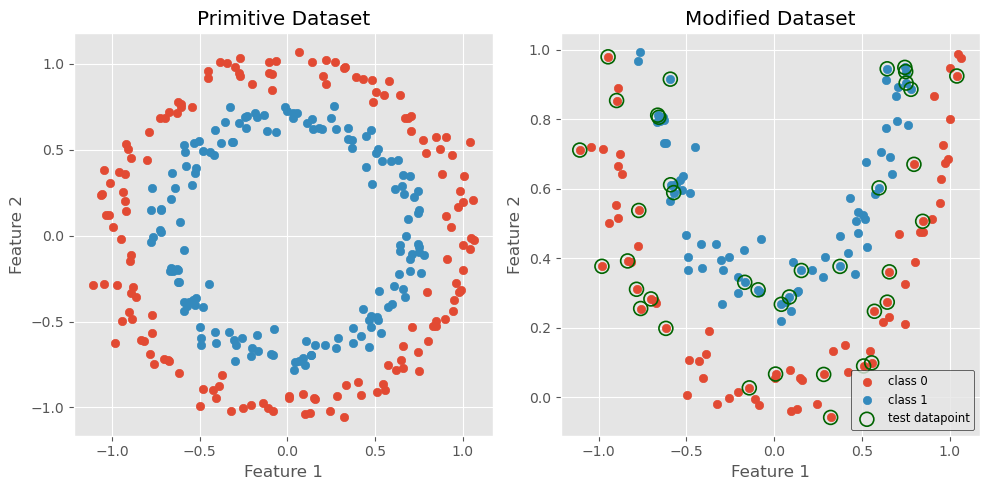

In [17]:
from sklearn.datasets import make_circles

Xs, ys = make_circles(n_samples=300, noise=0.06, random_state=10, factor=0.7)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axes[0].scatter(Xs[ys==0, 0], Xs[ys==0, 1])
axes[0].scatter(Xs[ys==1, 0], Xs[ys==1, 1])
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].set_title('Primitive Dataset')

ys = ys[Xs[:, 1] <= 0]
Xs = Xs[Xs[:, 1] <= 0]
Xs[:, 1] = Xs[:, 1] + 1

X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=0.25, random_state=4)

axes[1].scatter(Xs[ys==0, 0], Xs[ys==0, 1], label='class 0')
axes[1].scatter(Xs[ys==1, 0], Xs[ys==1, 1], label='class 1')
axes[1].scatter(X_test[:, 0], X_test[:, 1], facecolor='none', edgecolor='darkgreen', s=100, label='test datapoint', linewidths=1.2)
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].set_title('Modified Dataset')
axes[1].legend(loc='lower right', fontsize='small', edgecolor='black')

plt.tight_layout()

Now that we have our new train and test sets, to show that our previous approach (linear decision boundary) can't be applied to the new data, we are going to train both from-scratch and scikit-learn classifiers on the new data and plot their decision boundaries.

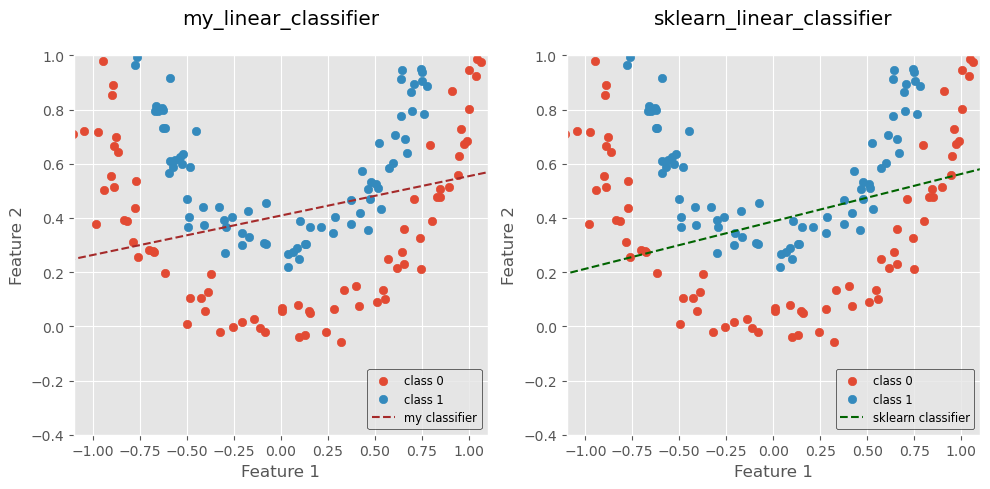

In [18]:
my_linear_classifier = logistic_regression(alpha=0.5, num_of_features=2)
for i in range(1000):
    my_linear_classifier.update(X_train, y_train)

Xs_line1 = np.linspace(min(Xs[:, 0]) - 0.2, max(Xs[:, 0]) + 0.2, 100)
m = -my_linear_classifier.thetas[1] / my_linear_classifier.thetas[2]
c = -my_linear_classifier.thetas[0] / my_linear_classifier.thetas[2]
ys_line1 = m * Xs_line1 + c

sklearn_linear_classifier = LogisticRegression()

sklearn_linear_classifier.fit(X_train, y_train)

Xs_line2 = np.linspace(min(Xs[:, 0]) - 0.2, max(Xs[:, 0]) + 0.2, 100)
m = -sklearn_linear_classifier.coef_[0,0] / sklearn_linear_classifier.coef_[0,1]
c = -sklearn_linear_classifier.intercept_[0] / sklearn_linear_classifier.coef_[0,1]
ys_line2 = m * Xs_line2 + c


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axes[0].scatter(Xs[ys==0, 0], Xs[ys==0, 1], label='class 0')
axes[0].scatter(Xs[ys==1, 0], Xs[ys==1, 1], label ='class 1')
axes[0].plot(Xs_line1, ys_line1, color='brown' , linestyle='--', label='my classifier')
axes[0].set_xlim((-1.1, 1.1))
axes[0].set_ylim((-0.4, 1))
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].set_title('my_linear_classifier\n')
axes[0].legend(loc='lower right', fontsize='small', edgecolor='black')

axes[1].scatter(Xs[ys==0, 0], Xs[ys==0, 1], label='class 0')
axes[1].scatter(Xs[ys==1, 0], Xs[ys==1, 1], label ='class 1')
axes[1].plot(Xs_line2, ys_line2, color='darkgreen', linestyle='--', label='sklearn classifier')
axes[1].set_xlim((-1.1, 1.1))
axes[1].set_ylim((-0.4, 1))
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].set_title('sklearn_linear_classifier\n')
axes[1].legend(loc='lower right', fontsize='small', edgecolor='black')

plt.tight_layout()

After plotting their decision boundary, their accuracy on the test dataset will be calculated and compared. 

In [19]:
def accuracy_calculator(preds):
    acc = np.mean(preds == y_test)
    return acc

log_preds = my_linear_classifier.predict(X_test)
sklearn_classifier_preds = sklearn_linear_classifier.predict(X_test)

accuracy_on_mine = accuracy_calculator(log_preds)
accuracy_on_sklearn = accuracy_calculator(sklearn_classifier_preds)

print('\n-------------------------------------------------------------------------------------------------')
print('final accuracy of the from scratch version on test dataset :', accuracy_on_mine)
print('-------------------------------------------------------------------------------------------------')
print('final accuracy of the scikit-learn linear regression model on test dataset :', accuracy_on_sklearn)
print('-------------------------------------------------------------------------------------------------\n')


-------------------------------------------------------------------------------------------------
final accuracy of the from scratch version on test dataset : 0.6153846153846154
-------------------------------------------------------------------------------------------------
final accuracy of the scikit-learn linear regression model on test dataset : 0.5641025641025641
-------------------------------------------------------------------------------------------------



As you can see, using the previous method for classification on the new dataset will not lead to acceptable results.

So besides the current two features of the dataset, we need new features to represent higher orders of these two. As the shape of the dataset is like a second-order polynomial (consider `feature2` as the y-axis and the `feature1` as the x-axis), the only feature that we going to add to the dataset is the **first feature (`feature1`) to the power of 2** $((x_0)^2)$. After adding this new feature to the dataset, we are going to make a new classifier and train it on the new dataset, the decision boundary in the process of training will be animated. This new classifier uses the `logistic_regression` class (the only difference is that this time our dataset has 3 features in it).

**Note**: In order to plot the decision boundary, we are using $\theta{s}$  (bias, and coefficients) to make a straight-line's equation, and in that equation, $x_1$ is taken as input and the corresponding output value will be on $x_2$ axis.

As mentioned before, the output of the logit function will always be between 0 and 1. The desired output is discrete values of either 0 or 1, by setting value 0.5 as the threshold, we can conclude that the output will be 1 if $\quad\theta^TX > 0\quad$, and 1 if $\quad\theta^TX < 0$. As a result, the decision boundary is defined by the equation $\quad\theta^TX = 0$.

$\text{Equation of straight line : }\qquad y=mx+b\qquad\qquad$

$\text{Equation of decision boundary : }\qquad 0 \quad=\quad \theta^TX$

$ \qquad \quad 0 \quad=\quad \theta^TX \quad=\quad \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 (x_1)^2 \qquad\qquad (x_0=1)$

$ \Rightarrow \qquad  (-1) \theta_2 x_2 \quad=\quad \theta_0 x_0 + \theta_1 x_1 + \theta_3 (x_1)^2$

$ \Rightarrow \qquad x_2 = (-1) \dfrac{\theta_0 x_0}{\theta_2} + (-1) \dfrac{\theta_1 x_1}{\theta_2} + (-1) \dfrac{\theta_3 (x_1)^2}{\theta_2}
  \qquad\qquad \left(
        y = x_2\quad,
  \quad x = x_1\right)$



In [26]:
new_Xs = np.concatenate((Xs, (Xs[:, 0]**2).reshape((-1, 1))), axis=1) 
non_linear_X_train, non_linear_X_test, y_train, y_test = train_test_split(new_Xs, ys, test_size=0.25, random_state=4)

my_ploynomial_classifier = logistic_regression(alpha=0.3, num_of_features=3)

fig, ax = plt.subplots()
loss_on_train = []
loss_on_test = []
accuracy_on_train = []
accuracy_on_test = []


def animate(i):
    loss_on_train.append(my_ploynomial_classifier.cost_function(non_linear_X_train, y_train))
    loss_on_test.append(my_ploynomial_classifier.cost_function(non_linear_X_test, y_test))
    accuracy_on_train.append( np.mean(my_ploynomial_classifier.predict(non_linear_X_train) == y_train))
    accuracy_on_test.append( np.mean(my_ploynomial_classifier.predict(non_linear_X_test) == y_test))       
    
    Xs_line = np.linspace(min(Xs[:, 0]), max(Xs[:, 0]), 100)
    m1 = -my_ploynomial_classifier.thetas[1] / my_ploynomial_classifier.thetas[2]
    m2 = -my_ploynomial_classifier.thetas[3] / my_ploynomial_classifier.thetas[2]
    c = -my_ploynomial_classifier.thetas[0] / my_ploynomial_classifier.thetas[2]
    ys_line = m2 * Xs_line**2 + m1 * Xs_line + c

    ax.cla()
    ax.scatter(Xs[ys==0, 0], Xs[ys==0, 1], label='class 0')
    ax.scatter(Xs[ys==1, 0], Xs[ys==1, 1], label ='class 1')
    ax.plot(Xs_line, ys_line, color='brown' , linestyle='--', label='my classifier')
    ax.set_xlim((-1.1, 1.1))
    ax.set_ylim((-0.4, 1))
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('my_polynomial_classifier\n')
    ax.legend(loc='lower right', fontsize='small', edgecolor='black')
    my_ploynomial_classifier.update(non_linear_X_train, y_train)
    

ani = FuncAnimation(fig, animate, frames=3000, interval=6)

plt.close()

Using `HTML` function, we have a video in output which shows how our curved-line decision boundary fits on the dataset, step by step.

The animation is available as `Logistic_regression(Polynomial dicision boundary).mp4` video file.

In [27]:
HTML(ani.to_html5_video())

The next two subplots are visualizing the behavior of the new classifier by calculating loss function and accuracy on both train and test datasets as the number of training iterations increases.

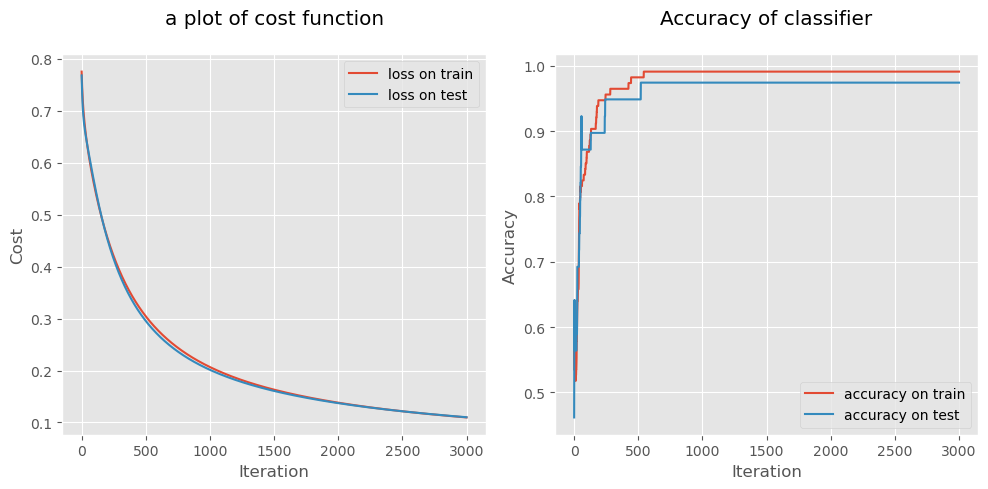

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))


axes[0].plot(list(range(len(loss_on_train))), loss_on_train, label='loss on train')
axes[0].plot(list(range(len(loss_on_test))), loss_on_test, label='loss on test')
axes[0].legend()
axes[0].set_title('a plot of cost function\n')
axes[0].set_xlabel('Iteration')
axes[0].set_ylabel('Cost')


axes[1].plot(list(range(len(accuracy_on_train))), accuracy_on_train, label='accuracy on train')
axes[1].plot(list(range(len(accuracy_on_test))), accuracy_on_test, label='accuracy on test')
axes[1].legend()
axes[1].set_title('Accuracy of classifier\n')
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('Accuracy')
plt.tight_layout()

---
### Section II
---

In the second section of part two, we are going to create a logistic regression classifier model using scikit-learn module. `penalty` parameter is set to `none` so the classifier no longer uses regularization (as there is no regularization in the from-scratch version), the maximum number of iterations is set to 3000, and the tolerance is set to 0.001 as stopping criteria.  

**Note**: In this new classifier, `lbfgs` is used as the solver for the classifier, however, we used the **gradient descent** as the solver for the from-scratch version of the classifier. 

One of the big differences between `lbfgs` and `gradient descent` is the fact that is necessary to set a value for the hyperparameter $\alpha$ in `gradient descent`, however, there is no such thing in `lbfgs`.

After creating the classifier, then its going to be trained on new train dataset. 

In [23]:
sklearn_polynomial_classifier = LogisticRegression(penalty='none', max_iter=3000, tol=1e-3)           

sklearn_polynomial_classifier.fit(non_linear_X_train, y_train)

LogisticRegression(max_iter=3000, penalty='none', tol=0.001)

Now that we have both classifiers created and trained, the next step is to compare models. to fulfill this objective, first of all, we are going to visualize the decision boundaries of both models in two subplots, in the next cell.

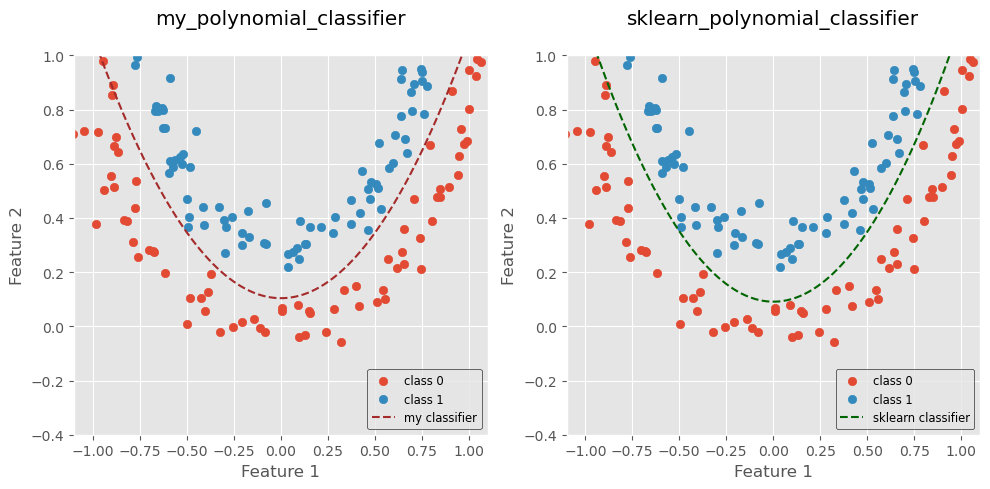

In [30]:
Xs_line1 = np.linspace(min(Xs[:, 0]), max(Xs[:, 0]), 100)
m1 = -my_ploynomial_classifier.thetas[1] / my_ploynomial_classifier.thetas[2]
m2 = -my_ploynomial_classifier.thetas[3] / my_ploynomial_classifier.thetas[2]
c = -my_ploynomial_classifier.thetas[0] / my_ploynomial_classifier.thetas[2]
ys_line1 = m2 * Xs_line1**2 + m1 * Xs_line1 + c

Xs_line2 = np.linspace(min(new_Xs[:, 0]), max(new_Xs[:, 0]), 100)
m1 = -sklearn_polynomial_classifier.coef_[0,0] / sklearn_polynomial_classifier.coef_[0,1]
m2 = -sklearn_polynomial_classifier.coef_[0,2] / sklearn_polynomial_classifier.coef_[0,1]
c = -sklearn_polynomial_classifier.intercept_[0] / sklearn_polynomial_classifier.coef_[0,1]
ys_line2 = m2 * Xs_line2**2 + m1 * Xs_line2 + c

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axes[0].scatter(Xs[ys==0, 0], Xs[ys==0, 1], label='class 0')
axes[0].scatter(Xs[ys==1, 0], Xs[ys==1, 1], label ='class 1')
axes[0].plot(Xs_line1, ys_line1, color='brown' , linestyle='--', label='my classifier')
axes[0].set_xlim((-1.1, 1.1))
axes[0].set_ylim((-0.4, 1))
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].set_title('my_polynomial_classifier\n')
axes[0].legend(loc='lower right', fontsize='small', edgecolor='black')

axes[1].scatter(Xs[ys==0, 0], Xs[ys==0, 1], label='class 0')
axes[1].scatter(Xs[ys==1, 0], Xs[ys==1, 1], label ='class 1')
axes[1].plot(Xs_line2, ys_line2, color='darkgreen', linestyle='--', label='sklearn classifier')
axes[1].set_xlim((-1.1, 1.1))
axes[1].set_ylim((-0.4, 1))
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].set_title('sklearn_polynomial_classifier\n')
axes[1].legend(loc='lower right', fontsize='small', edgecolor='black')

plt.tight_layout()

After plotting their decision boundary, their accuracy on the test dataset will be calculated and compared. 

In [31]:
def accuracy_calculator(preds):
    acc = np.mean(preds == y_test)
    return acc

log_preds = my_ploynomial_classifier.predict(non_linear_X_test)
sklearn_classifier_preds = sklearn_polynomial_classifier.predict(non_linear_X_test)

accuracy_on_mine = accuracy_calculator(log_preds)
accuracy_on_sklearn = accuracy_calculator(sklearn_classifier_preds)

print('\n-------------------------------------------------------------------------------------------------')
print('final accuracy of the from scratch version on test dataset :', accuracy_on_mine)
print('-------------------------------------------------------------------------------------------------')
print('final accuracy of the scikit-learn linear regression model on test dataset :', accuracy_on_sklearn)
print('-------------------------------------------------------------------------------------------------\n')


-------------------------------------------------------------------------------------------------
final accuracy of the from scratch version on test dataset : 0.9743589743589743
-------------------------------------------------------------------------------------------------
final accuracy of the scikit-learn linear regression model on test dataset : 1.0
-------------------------------------------------------------------------------------------------

